In [2]:
import pandas as pd
from io import StringIO
pd.set_option('display.max_columns', None)

In [3]:
#Import dataframe
df_100pos = pd.read_csv('DataFiles/merged_df_100pos.csv', low_memory=False)

In [4]:
# Converter function for height 
def feet_to_meters(height):
    if isinstance(height, str):
        feet, inches = map(int, height.split('-'))
        total_feet = feet + inches / 12  # Convert inches to feet
        total_meters = total_feet * 0.3048  # Convert feet to meters
        return round(total_meters, 2)  # Round to 2 decimals
    else:
        return None  # Handle missing or invalid values

In [5]:
# Apply the function to convert heights
df_100pos['PLAYER_HEIGHT_METERS'] = df_100pos['HEIGHT'].apply(feet_to_meters)

In [6]:
# Adding additional advanced metric columns

# Shooting efficiency
df_100pos['FG3A%'] = df_100pos['FG3A'] / df_100pos['FGA']
df_100pos['PTS/FGA'] = df_100pos['PTS'] / df_100pos['FGA']
df_100pos['FG3M/FGM'] = df_100pos['FG3M'] / df_100pos['FGM']
df_100pos['FTA/FGA'] = df_100pos['FTA'] / df_100pos['FGA']

# True Shooting Percentage
df_100pos['TRU%'] = 0.5 * df_100pos['PTS'] / (df_100pos['FGA'] + 0.475 * df_100pos['FTA'])

# Assists to Turnover Ratio
df_100pos['AST_TOV'] = df_100pos['AST'] / df_100pos['TOV']

df_100pos['POSSESSION'] = df_100pos.apply(lambda row: row['FGA'] + 0.44 * row['FTA'] - row['OREB'] + row['TOV'], axis=1)

df_100pos[(df_100pos['PLAYER_ID'] == 1629029)]

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,Year,Season,COLLEGE,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,JERSEY_NUMBER,POSITION,HEIGHT,WEIGHT,FROM_YEAR,TO_YEAR,PLAYER_HEIGHT_METERS,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV,POSSESSION
17024,1629029,Luka Doncic,1610612742,DAL,20.0,72,28,44,0.389,47.4,10.3,24.2,0.427,3.4,10.5,0.327,7.1,9.9,0.713,1.8,9.8,11.5,8.8,5.1,1.6,0.5,1.1,2.8,8.3,31.2,2018-19,Regular Season,NaN,Slovenia,2018,1,3,77,F-G,6-7,230.0,2018,2023,2.01,0.433884,1.289256,0.330097,0.409091,0.539746,1.725490,31.856
17025,1629029,Luka Doncic,1610612742,DAL,21.0,61,36,25,0.590,47.3,13.4,29.0,0.463,4.0,12.5,0.316,9.8,13.0,0.758,1.8,11.4,13.2,12.4,6.0,1.4,0.3,1.5,3.5,10.5,40.6,2019-20,Regular Season,NaN,Slovenia,2018,1,3,77,F-G,6-7,230.0,2018,2023,2.01,0.431034,1.400000,0.298507,0.448276,0.577114,2.066667,38.920
17026,1629029,Luka Doncic,1610612742,DAL,21.0,6,2,4,0.333,46.7,13.9,27.9,0.500,3.5,9.6,0.364,9.2,13.9,0.656,0.9,12.0,12.9,11.3,6.8,1.5,0.7,1.1,3.7,12.0,40.5,2019-20,Playoffs,NaN,Slovenia,2018,1,3,77,F-G,6-7,230.0,2018,2023,2.01,0.344086,1.451613,0.251799,0.498208,0.586914,1.661765,39.916
17027,1629029,Luka Doncic,1610612742,DAL,22.0,66,40,26,0.606,48.4,13.8,28.9,0.479,4.1,11.7,0.350,7.4,10.1,0.730,1.2,10.1,11.3,12.1,6.0,1.4,0.8,1.1,3.3,7.8,39.1,2020-21,Regular Season,NaN,Slovenia,2018,1,3,77,F-G,6-7,230.0,2018,2023,2.01,0.404844,1.352941,0.297101,0.349481,0.580162,2.016667,38.144
17028,1629029,Luka Doncic,1610612742,DAL,22.0,7,3,4,0.429,50.8,17.4,35.4,0.490,5.6,13.7,0.408,4.9,9.2,0.529,0.7,9.2,9.9,13.0,5.8,1.6,0.5,0.9,3.1,8.1,45.2,2020-21,Playoffs,NaN,Slovenia,2018,1,3,77,F-G,6-7,230.0,2018,2023,2.01,0.387006,1.276836,0.321839,0.259887,0.568268,2.241379,44.548
17029,1629029,Luka Doncic,1610612742,DAL,23.0,65,44,21,0.677,50.0,13.9,30.5,0.457,4.4,12.4,0.353,7.9,10.6,0.744,1.2,11.7,12.9,12.3,6.3,1.6,0.8,1.0,3.1,8.7,40.1,2021-22,Regular Season,NaN,Slovenia,2018,1,3,77,F-G,6-7,230.0,2018,2023,2.01,0.406557,1.314754,0.316547,0.347541,0.564232,1.952381,40.264
17030,1629029,Luka Doncic,1610612742,DAL,23.0,15,7,8,0.467,51.4,14.9,32.8,0.455,4.8,13.8,0.345,9.7,12.6,0.770,0.9,12.8,13.7,8.9,5.5,2.5,0.8,1.5,4.1,10.6,44.3,2021-22,Playoffs,NaN,Slovenia,2018,1,3,77,F-G,6-7,230.0,2018,2023,2.01,0.420732,1.350610,0.322148,0.384146,0.571097,1.618182,42.944
17031,1629029,Luka Doncic,1610612742,DAL,24.0,66,33,33,0.500,49.0,14.8,29.7,0.496,3.8,11.1,0.342,10.6,14.2,0.742,1.1,10.6,11.7,10.9,4.8,1.8,0.7,0.9,3.4,9.9,43.9,2022-23,Regular Season,NaN,Slovenia,2018,1,3,77,F-G,6-7,230.0,2018,2023,2.01,0.373737,1.478114,0.256757,0.478114,0.602277,2.270833,39.648


In [7]:
# Replacing intermediary positions with one. All in all there are 3 positions - C, F and G. 
df_100pos['POSITION'] = df_100pos['POSITION'].str.replace('F-C', 'F').replace('C-F', 'C').replace('F-G', 'F').replace('G-F', 'G')

In [8]:
# European countries in wider basketball sense:
europe = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark',
  'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland',
  'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
  'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 
  'United Kingdom', 'Norway', 'Switzerland', 'Belarus', 'Russia', 'Ukraine',
  'Moldova', 'Georgia', 'Armenia', 'Azerbaijan', 'Turkey', 'Israel', 'Albania',
  'Macedonia', 'Serbia', 'Montenegro', 'Bosnia and Herzegovina', 'Iceland']

In [9]:
# Define function for European countries
def filter_europe(df, column_name, europe):
    return df[df[column_name].isin(europe)]

In [10]:
# New object for European players playing at F in regular season games:
europe_F_regular = filter_europe(df_100pos, 'COUNTRY', europe)
europe_F_regular = europe_F_regular.loc[europe_F_regular['POSITION'].isin(['F']) & europe_F_regular['Season'].isin(['Regular Season'])]

In [11]:
# Define function for non-european countries
def filter_non_europe(df, column_name='COUNTRY', country_list=europe):
    return df[~df[column_name].isin(europe)]

In [12]:
# New object for Non-europe players playing at F in regular season games:
non_europe_F_regular = filter_non_europe(df_100pos)
non_europe_F_regular = non_europe_F_regular.loc[non_europe_F_regular['POSITION'].isin(['F']) & non_europe_F_regular['Season'].isin(['Regular Season'])]

In [26]:
# Check number of unique European forwards since 1996 during regular season:
europe_F_regular.groupby('POSITION')['PLAYER_ID'].nunique()

POSITION
F    103
Name: PLAYER_ID, dtype: int64

In [27]:
# Check number of unique Non-European forwards since 1996 during regular season:
non_europe_F_regular.groupby('POSITION')['PLAYER_ID'].nunique()

POSITION
F    876
Name: PLAYER_ID, dtype: int64

In [110]:
# Check null values for 'FG3M‘ and 'FGM' used to calculated 'FG3M/FGM':
europe_F_regular[['FG3M/FGM', 'AST', 'STL', 'FG3A%']].describe()

,FG3M/FGM,AST,STL,FG3A%
count,464.000000,470.000000,470.000000,470.000000
mean,0.282696,3.250426,1.458298,0.350377
std,0.193932,1.763280,0.782133,0.203894
min,0.000000,0.000000,0.000000,0.000000
25%,0.128208,2.200000,1.000000,0.203007
50%,0.289394,2.900000,1.400000,0.378034
75%,0.403012,3.800000,1.700000,0.485999
max,1.000000,12.400000,9.100000,1.000000


In [17]:
# Checking for anomalies via comparing AVG metrics between European and Non-European:

import altair as alt
import pandas as pd
import altair_saver


# Annahme: Sie haben zwei DataFrames: data_per_min_europe_regular und data_per_min_usa_regular

# Fügen Sie eine neue Spalte hinzu, um anzuzeigen, ob der Spieler Europäer ist oder nicht
europe_F_regular['Europe'] = 'European'
non_europe_F_regular['Europe'] = 'Non-European'

# Kombinieren Sie die beiden DataFrames
combined_df = pd.concat([europe_F_regular, non_europe_F_regular])

# Liste der Metriken, die geplottet werden sollen
metrics = ['FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA', 
           'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 
           'PF', 'PTS', 'FG3A%', 'PTS/FGA', 'FG3M/FGM', 'FTA/FGA', 
           'TRU%', 'AST_TOV', 'POSSESSION']

# Liste zum Speichern der Diagramme
charts = []

# Einen Bruchteil des kombinierten DataFrame auswählen
sampled_df = combined_df.sample(frac=0.5)  # Passen Sie den Bruchteil bei Bedarf an

# Für jede Metrik ein gruppiertes Balkendiagramm erstellen und die Diagramme in eine Liste speichern
for metric in metrics:
    chart = alt.Chart(sampled_df).mark_bar().encode(
        x=alt.X('Europe:N', title='Europe'),
        y=alt.Y(f'median({metric}):Q', title=f'Average {metric}'),
        color=alt.Color('Europe:N', legend=alt.Legend(title='Europe'))
    ).properties(
        title=f'Average {metric} by Europe',
        width=400,
        height=300
    )
    charts.append(chart)

# Diagramme in sechs Zeilen stapeln
alt_row = alt.vconcat(*[alt.hconcat(*charts[i:i+4]) for i in range(0, len(charts), 4)])

# Die Diagramme anzeigen
alt_row


/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].a

alt.VConcatChart(...)

In [28]:
# Create a heatmap for CORR between different metrics
import altair as alt
import pandas as pd

# Select the columns you want to check for correlation
selected_columns = ['PLAYER_HEIGHT_METERS', 'FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA', 
                    'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG3M/FGM', 'TRU%']

# Create a correlation matrix
correlation_matrix = df_100pos[selected_columns].corr()

# Convert correlation matrix to tidy format
correlation_tidy = correlation_matrix.stack().reset_index()
correlation_tidy.columns = ['variable1', 'variable2', 'correlation']

# Create heatmap
heatmap = alt.Chart(correlation_tidy).mark_rect().encode(
    x='variable1:O',
    y='variable2:O',
    color='correlation:Q'
).properties(
    title='Correlation Heatmap'
)

# Display heatmap
heatmap

/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

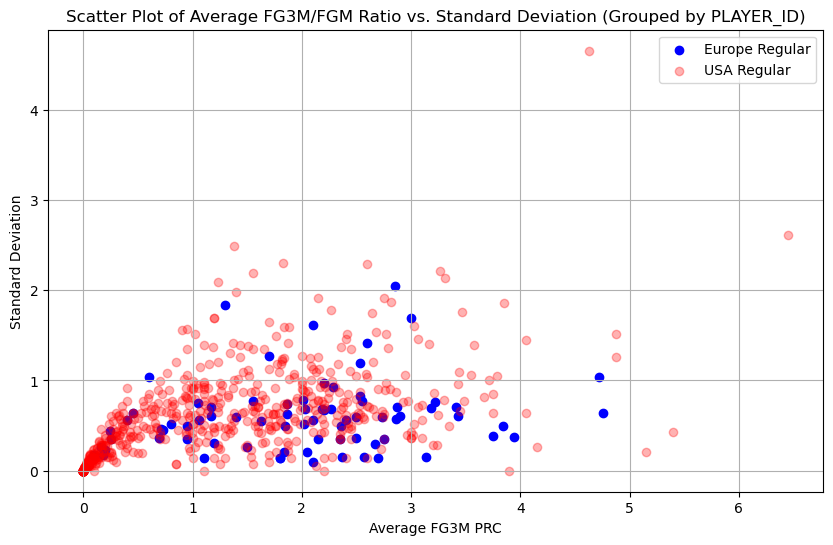

Standard Deviation for Europe: 0.5656412567559826
Standard Deviation for USA: 0.5095870194846766


In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate mean and standard deviation for FG3M/FGM for data_per_min_europe_regular
avg_fg3m_fgm_europe = europe_F_regular.groupby('PLAYER_ID')['FG3M'].agg(['mean', 'std'])

# Calculate mean and standard deviation for FG3M/FGM for data_per_min_usa_regular
avg_fg3m_fgm_usa = non_europe_F_regular.groupby('PLAYER_ID')['FG3M'].agg(['mean', 'std'])

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot for data_per_min_europe_regular
plt.scatter(avg_fg3m_fgm_europe['mean'], avg_fg3m_fgm_europe['std'], label='Europe Regular', color='blue')

# Scatter plot for data_per_min_usa_regular
plt.scatter(avg_fg3m_fgm_usa['mean'], avg_fg3m_fgm_usa['std'], label='USA Regular', color='red', alpha=0.3)

# Add labels and title
plt.xlabel('Average FG3M PRC')
plt.ylabel('Standard Deviation')
plt.title('Scatter Plot of Average FG3M/FGM Ratio vs. Standard Deviation (Grouped by PLAYER_ID)')
plt.legend()

# Show plot
plt.grid(True)
plt.show()


std_europe = avg_fg3m_fgm_europe['std'].mean()
std_usa = avg_fg3m_fgm_usa['std'].mean()

print("Standard Deviation for Europe:", std_europe)
print("Standard Deviation for USA:", std_usa)

In [95]:
# Bar chart with leading European countries on FG3M/FGM:

import pandas as pd
import altair as alt

# Calculate mean and standard deviation for AVG AST for Europeans:
avg_3p_europe = europe_F_regular.groupby('COUNTRY')['FG3M/FGM'].agg(['mean']).reset_index()

bar_europe = alt.Chart(avg_3p_europe).mark_bar().encode(
    x='COUNTRY',
    y='mean:Q'
)
bar_europe 

/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

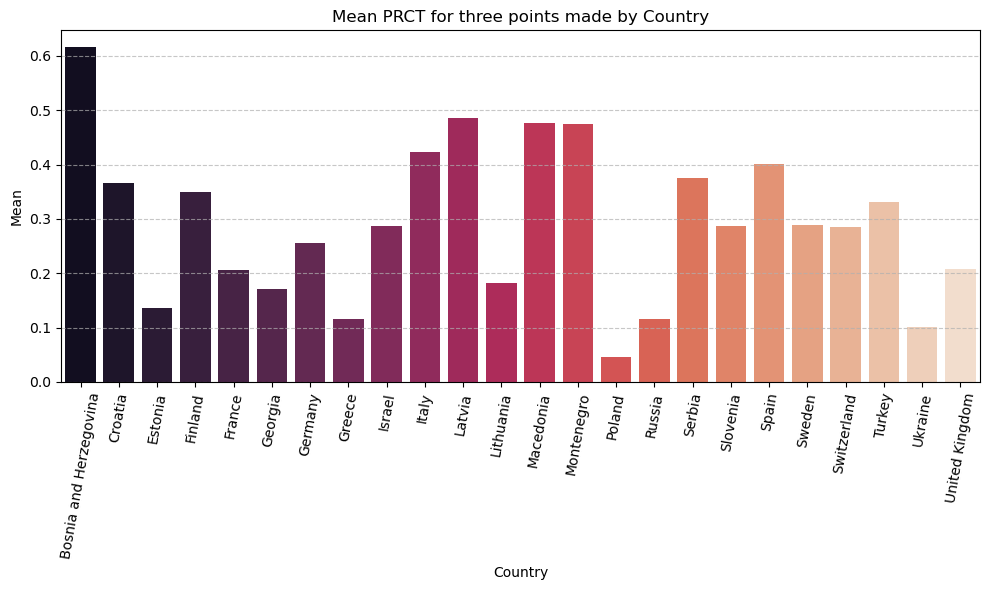

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate mean % for three points made for Europeans:
avg_3p_europe = europe_F_regular.groupby('COUNTRY')['FG3M/FGM'].agg(['mean']).reset_index()

fig, ax = plt.subplots(figsize=(10, 6)) 

sns.barplot(x='COUNTRY', y="mean", data=avg_3p_europe, palette='rocket', linewidth=2)  # Create a count plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability with many countries

plt.title("Mean PRCT for three points made by Country")
plt.xlabel("Country")
plt.ylabel("Mean")
plt.xticks(rotation=80)  # Rotate x-axis labels
plt.ylim(ymin=0)        # Start y-axis at zero

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines with style

plt.tight_layout()  # Adjust spacing for better readability

plt.show()  # Display the plot

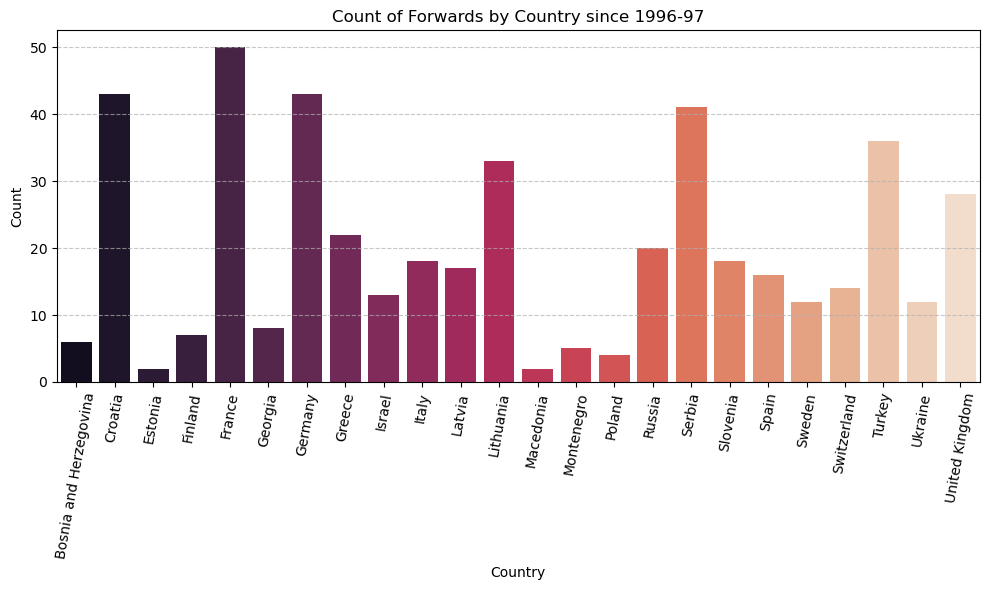

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Amount of players from those countries since 1996:
count_europe = europe_F_regular.groupby('COUNTRY')['PLAYER_ID'].agg(['count']).reset_index()

fig, ax = plt.subplots(figsize=(10, 6)) 

sns.barplot(x='COUNTRY', y="count", data=count_europe, palette='rocket', linewidth=2)  # Create a count plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability with many countries

plt.title("Count of Forwards by Country since 1996-97")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=80)  # Rotate x-axis labels
plt.ylim(ymin=0)        # Start y-axis at zero

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines with style

plt.tight_layout()  # Adjust spacing for better readability

plt.show()  # Display the plot

In [22]:
import pandas as pd
import altair as alt

# Calculate mean and standard deviation for AVG AST for data_per_min_europe_regular
avg_ast_std_europe = europe_F_regular.groupby('PLAYER_NAME')['FG3M'].agg(['mean', 'std']).reset_index()

# Calculate mean and standard deviation for AVG AST for data_per_min_usa_regular
avg_ast_std_usa = non_europe_F_regular.groupby('PLAYER_NAME')['FG3M'].agg(['mean', 'std']).reset_index()

# Create scatter plot for data_per_min_europe_regular
scatter_europe = alt.Chart(avg_ast_std_europe).mark_circle(size=60).encode(
    x='mean:Q',
    y='std:Q',
    tooltip=['PLAYER_NAME', 'mean', 'std'],
    color=alt.value('blue'),
    opacity=alt.value(0.8)
).properties(
    width=400,
    height=300,
    title='Scatter Plot of Average FG3M vs. Standard Deviation (Europe Regular)'
)

# Create scatter plot for data_per_min_usa_regular
scatter_usa = alt.Chart(avg_ast_std_usa).mark_circle(size=60).encode(
    x='mean:Q',
    y='std:Q',
    tooltip=['PLAYER_NAME', 'mean', 'std'],
    color=alt.value('red'),
    opacity=alt.value(0.8)
).properties(
    width=400,
    height=300,
    title='Scatter Plot of Average FG3M vs. Standard Deviation (USA Regular)'
)

# Concatenate the plots
scatter_europe | scatter_usa

/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.HConcatChart(...)

In [23]:
import pandas as pd
import altair as alt

# Calculate mean and standard deviation for AVG AST for data_per_min_europe_regular
avg_ast_std_europe = europe_F_regular.groupby('PLAYER_NAME')['FG3M'].agg(['median', 'std']).reset_index()

# Calculate mean and standard deviation for AVG AST for data_per_min_usa_regular
avg_ast_std_usa = non_europe_F_regular.groupby('PLAYER_NAME')['FG3M'].agg(['median', 'std']).reset_index()

# Create scatter plot for data_per_min_europe_regular
scatter_europe = alt.Chart(avg_ast_std_europe).mark_circle(size=60).encode(
    x='median:Q',
    y='std:Q',
    tooltip=['PLAYER_NAME', 'median', 'std'],
    color=alt.value('blue'),
    opacity=alt.value(0.8)
).properties(
    width=400,
    height=300,
    title='Scatter Plot of Average FG3M vs. Standard Deviation (Europe Regular)'
)

# Create scatter plot for data_per_min_usa_regular
scatter_usa = alt.Chart(avg_ast_std_usa).mark_circle(size=60).encode(
    x='median:Q',
    y='std:Q',
    tooltip=['PLAYER_NAME', 'median', 'std'],
    color=alt.value('red'),
    opacity=alt.value(0.8)
).properties(
    width=400,
    height=300,
    title='Scatter Plot of Average FG3M vs. Standard Deviation (USA Regular)'
)

# Concatenate the plots
scatter_europe | scatter_usa

/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.HConcatChart(...)

In [24]:
europe_F_regular[europe_F_regular['PLAYER_NAME'] == 'Kostas Antetokounmpo']

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,Year,Season,COLLEGE,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,JERSEY_NUMBER,POSITION,HEIGHT,WEIGHT,FROM_YEAR,TO_YEAR,PLAYER_HEIGHT_METERS,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV,POSSESSION,Europe
17004,1628961,Kostas Antetokounmpo,1610612742,DAL,21.0,2,1,1,0.5,48.0,0.0,13.6,0.0,0.0,0.0,0.0,9.1,18.2,0.500,0.0,4.5,4.5,0.0,4.5,9.1,0.0,4.5,0.0,9.1,9.1,2018-19,Regular Season,Dayton,Greece,2018,2,60,37,F,6-10,200.0,2018,2020,2.08,0.0,0.669118,NaN,1.338235,0.204540,0.000000,26.108,European
17005,1628961,Kostas Antetokounmpo,1610612747,LAL,22.0,5,3,2,0.6,43.7,6.5,6.5,1.0,0.0,0.0,0.0,2.2,4.3,0.500,4.3,2.2,6.5,4.3,2.2,0.0,0.0,0.0,4.3,4.3,15.2,2019-20,Regular Season,Dayton,Greece,2018,2,60,37,F,6-10,200.0,2018,2020,2.08,0.0,2.338462,0.0,0.661538,0.889669,1.954545,6.292,European
17006,1628961,Kostas Antetokounmpo,1610612747,LAL,23.0,15,6,9,0.4,42.9,2.3,7.7,0.3,0.0,0.0,0.0,4.6,10.0,0.462,3.1,11.5,14.6,0.8,8.5,1.5,3.1,3.1,6.2,6.9,9.2,2020-21,Regular Season,Dayton,Greece,2018,2,60,37,F,6-10,200.0,2018,2020,2.08,0.0,1.194805,0.0,1.298701,0.369478,0.094118,17.500,European
